# **🔍 Exploration and Data Preprocessing**

In [802]:
import pandas as pd
import matplotlib.pyplot as plt

## **💽 Download the Data and Investigate the Columns**

The data is available as a CSV file. We will use the `pandas` library to read the data into a `DataFrame` and keep only the columns that we are interested in. The data contains the following columns:
| Column Name | Type | Description |
| --- | --- | --- |
| `BETRIEBSTAG` | Date (DD.MM.YYYY) | Date of the journey |
| `FAHRT_BEZEICHNER` | String | Identifier of the journey (see https://opentransportdata.swiss/en/cookbook/fahrt-id-journeyref/) |
| `BETREIBER_ID` | String | Identifier of the operator |
| `BETREIBER_ABK` | String | Abbreviation of the operator |
| `BETREIBER_NAME` | String | Name of the operator |
| `PRODUKT_ID` | Category | Identifier of the product |
| `LINIEN_ID` | String | Identifier of the line |
| `LINIEN_TEXT` | String | Name of the line |
| `UMLAUF_ID` | String | Identifier of the circuit (see https://opentransportdata.swiss/en/cookbook/umlauf/)|
| `VERKEHRSMITTEL_TEXT` | String | Type of transport |
| `ZUSATZFAHRT_TF` | Boolean | Whether the journey is an additional one |
| `FAELLT_AUS_TF` | Boolean | Whether the journey is cancelled |
| `BPUIC` | String | Identifier of the stop (see https://didok.ch/en/glossary-stop-points-location-codes/) |
| `HALTESTELLEN_NAME` | String | Name of the stop |
| `ANKUNFTSZEIT` | DateTime (DD.MM.YYYY HH:MM:SS) | Arrival time at the stop |
| `AN_PROGNOSE` | DateTime (DD.MM.YYYY HH:MM:SS) | Arrival time at the stop (predicted) |
| `AN_PROGNOSE_STATUS` | Category | Status of the predicted arrival time |
| `ABFAHRTSZEIT` | DateTime (DD.MM.YYYY HH:MM:SS) | Departure time from the stop |
| `AB_PROGNOSE` | DateTime (DD.MM.YYYY HH:MM:SS) | Departure time from the stop (predicted) |
| `AB_PROGNOSE_STATUS` | Category | Status of the predicted departure time |
| `DURCHFAHRT_TF` | Boolean | Whether the stop is a through stop |

In [803]:
# False if you want to download the data from the internet
LOCAL_DOWNLOAD = True
DATE_FILE = '2023-03-10' # Format YYYY-MM-DD

In [804]:
# Download the data
DATA_LINK = f"https://opentransportdata.swiss/dataset/0edc74a3-ad4d-486e-8657-f8f3b34a0979/resource/9de83058-0365-481d-85fa-a8477709b9fa/download/{DATE_FILE}_istdaten.csv"
DATA_FILE = f"data/{DATE_FILE}_istdaten.csv"
DATA_PATH = DATA_FILE if LOCAL_DOWNLOAD else DATA_LINK
transport_data = pd.read_csv(
    DATA_PATH, 
    sep=';',
    parse_dates=['BETRIEBSTAG', 'ANKUNFTSZEIT', 'AN_PROGNOSE', 'ABFAHRTSZEIT', 'AB_PROGNOSE'],
    dtype={
        'FAHRT_BEZEICHNER': 'string',
        'BETRIEBER_ID': 'string',
        'BETREIBER_ABK': 'string',
        'BETREIBER_NAME': 'string',
        'PRODUKT_ID': 'category',
        'LINIEN_ID': 'string',
        'LINIEN_TEXT': 'string',
        'UMLAUF_ID': 'string',
        'VERKEHRSMITTEL_TEXT': 'string',
        'ZUSATZFAHRT_TF': 'boolean',
        'FAELLT_AUS_TF': 'boolean',
        'BPUIC': 'int',
        'HALTESTELLEN_NAME': 'string',
        'AN_PROGNOSE_STATUS': 'category',
        'AB_PROGNOSE_STATUS': 'category',
        'DURCHFAHRT_TF': 'boolean'
    },
    dayfirst=True
)

In [805]:
transport_data.head()

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,UMLAUF_ID,VERKEHRSMITTEL_TEXT,...,FAELLT_AUS_TF,BPUIC,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
0,2023-03-10,80:800631:17230:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17230,RB,<NA>,RB,...,False,8500090,Basel Bad Bf,2023-03-10 04:59:00,2023-03-10 04:59:00,PROGNOSE,NaT,NaT,NaN,False
1,2023-03-10,80:800631:17233:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17233,RB,<NA>,RB,...,False,8500090,Basel Bad Bf,NaT,NaT,NaN,2023-03-10 06:07:00,2023-03-10 06:07:00,PROGNOSE,False
2,2023-03-10,80:800631:17234:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17234,RB,<NA>,RB,...,True,8500090,Basel Bad Bf,2023-03-10 05:56:00,NaT,UNBEKANNT,NaT,NaT,UNBEKANNT,False
3,2023-03-10,80:800631:17235:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17235,RB,<NA>,RB,...,False,8500090,Basel Bad Bf,NaT,NaT,NaN,2023-03-10 06:43:00,2023-03-10 06:43:00,PROGNOSE,False
4,2023-03-10,80:800631:17236:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17236,RB,<NA>,RB,...,False,8500090,Basel Bad Bf,2023-03-10 06:33:00,2023-03-10 06:37:00,PROGNOSE,NaT,NaT,NaN,False


In [806]:
transport_data.dtypes

BETRIEBSTAG            datetime64[ns]
FAHRT_BEZEICHNER               string
BETREIBER_ID                   object
BETREIBER_ABK                  string
BETREIBER_NAME                 string
PRODUKT_ID                   category
LINIEN_ID                      string
LINIEN_TEXT                    string
UMLAUF_ID                      string
VERKEHRSMITTEL_TEXT            string
ZUSATZFAHRT_TF                boolean
FAELLT_AUS_TF                 boolean
BPUIC                           int32
HALTESTELLEN_NAME              string
ANKUNFTSZEIT           datetime64[ns]
AN_PROGNOSE            datetime64[ns]
AN_PROGNOSE_STATUS           category
ABFAHRTSZEIT           datetime64[ns]
AB_PROGNOSE            datetime64[ns]
AB_PROGNOSE_STATUS           category
DURCHFAHRT_TF                 boolean
dtype: object

## **💬 Translate Column Names**

In [807]:
translations = {
    'BETRIEBSTAG': 'date',
    'FAHRT_BEZEICHNER': 'trip_id',
    'BETREIBER_ID': 'operator_id',
    'BETREIBER_ABK': 'operator_abbreviation',
    'BETREIBER_NAME': 'operator_name',
    'PRODUKT_ID': 'product_id',
    'LINIEN_ID': 'line_id',
    'LINIEN_TEXT': 'line_text',
    'UMLAUF_ID': 'circuit_id',
    'VERKEHRSMITTEL_TEXT': 'transport_type',
    'ZUSATZFAHRT_TF': 'is_additional_trip',
    'FAELLT_AUS_TF': 'is_cancelled',
    'BPUIC': 'stop_id',
    'HALTESTELLEN_NAME': 'stop_name',
    'ANKUNFTSZEIT': 'arrival_time',
    'AN_PROGNOSE': 'arrival_forecast',
    'AN_PROGNOSE_STATUS': 'arrival_forecast_status',
    'ABFAHRTSZEIT': 'departure_time',
    'AB_PROGNOSE': 'departure_forecast',
    'AB_PROGNOSE_STATUS': 'departure_forecast_status',
    'DURCHFAHRT_TF': 'is_through_trip'
}

transport_data = transport_data.rename(columns=translations)
transport_data.head()

,date,trip_id,operator_id,operator_abbreviation,operator_name,product_id,line_id,line_text,circuit_id,transport_type,...,is_cancelled,stop_id,stop_name,arrival_time,arrival_forecast,arrival_forecast_status,departure_time,departure_forecast,departure_forecast_status,is_through_trip
0,2023-03-10,80:800631:17230:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17230,RB,<NA>,RB,...,False,8500090,Basel Bad Bf,2023-03-10 04:59:00,2023-03-10 04:59:00,PROGNOSE,NaT,NaT,NaN,False
1,2023-03-10,80:800631:17233:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17233,RB,<NA>,RB,...,False,8500090,Basel Bad Bf,NaT,NaT,NaN,2023-03-10 06:07:00,2023-03-10 06:07:00,PROGNOSE,False
2,2023-03-10,80:800631:17234:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17234,RB,<NA>,RB,...,True,8500090,Basel Bad Bf,2023-03-10 05:56:00,NaT,UNBEKANNT,NaT,NaT,UNBEKANNT,False
3,2023-03-10,80:800631:17235:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17235,RB,<NA>,RB,...,False,8500090,Basel Bad Bf,NaT,NaT,NaN,2023-03-10 06:43:00,2023-03-10 06:43:00,PROGNOSE,False
4,2023-03-10,80:800631:17236:000,80:800631,DB,DB Regio AG Baden-Württemberg,Zug,17236,RB,<NA>,RB,...,False,8500090,Basel Bad Bf,2023-03-10 06:33:00,2023-03-10 06:37:00,PROGNOSE,NaT,NaT,NaN,False


## **🧼 Clean Data and Analyse Missing Values**

In [808]:
n_rows_before = transport_data.shape[0]
print(f"Number of rows in the dataset: {n_rows_before:,}")

Number of rows in the dataset: 2,347,175


In [809]:
# Get number of missing values per column
print(f"Number of total missing values in the dataset: {transport_data.isna().sum().sum():,}")
pd.DataFrame(transport_data.isna().sum(), columns=['Number of missing values'])

Number of total missing values in the dataset: 2,268,631


,Number of missing values
date,0
trip_id,0
operator_id,0
operator_abbreviation,0
operator_name,0
product_id,133
line_id,0
line_text,0
circuit_id,1209833
transport_type,7493


### **1️⃣ product_id**

The product IDs in the dataset represent various modes of public transportation available in Switzerland:

- **Bus**: Refers to bus services that connect different towns, cities, and suburbs, providing an essential mode of public transportation across the country.
- **Train**: Refers to trains or railway services, which are a crucial part of the Swiss public transport system, connecting cities, towns, and regions.
- **Rack_railway**: Refers to cogwheel trains, a unique type of railway that uses a toothed rack rail to climb steep gradients, often found in mountainous regions of Switzerland.
- **Metro**: Refers to urban rapid transit systems that provide high-capacity public transport within cities, such as the Lausanne Metro.
- **Boat**: Refers to passenger ferries and boat services on Swiss lakes, connecting towns and tourist attractions along the lakeshores.
- **Tram**: Refers to tram or light rail systems found in several Swiss cities, offering an efficient and eco-friendly mode of transportation within urban areas.

We decide to do the following:

- Delete all rows that have missing values in the `product_id` column.
- Translate the product IDs into English.
- Merge the `Bus` and `BUS` categories into a new single category `Bus`.

In [810]:
# Remove rows with missing values in product_id
print(f"Removing {transport_data['product_id'].isna().sum():,} rows with missing values in product_id.")
transport_data = transport_data[transport_data['product_id'].notna()]

Removing 133 rows with missing values in product_id.


In [811]:
# Merge Bus and BUS into Bus
transport_data['product_id'] = transport_data['product_id'].str.replace('BUS', 'Bus')

In [812]:
# Translate product_id
transport_data['product_id'] = transport_data['product_id'].replace({
    'Zahnradbahn': 'Rack_railway',
    'Schiff': 'Boat',
    'Zug': 'Train',
})

In [813]:
print(transport_data['product_id'].unique().tolist())

['Train', 'Bus', 'Rack_railway', 'Metro', 'Boat', 'Tram']


### **2️⃣ transport_type**

Transport types refer to the different modes of transportation available for travel, such as trains, buses, trams, and mountain railways. In Switzerland, various transport types are available for passengers to travel across different regions, from regional and intercity trains to buses and trams. Here is a list of some common transport types and their corresponding abbreviations in Switzerland:

- **B** (`Bus`): Local and regional bus services, often integrated with the train network.
- **BAT** (`Bootsanlegestelle`): Boat services offering scenic and leisurely journeys between towns and tourist attractions along the lakeshores.
- _**BN** (`Bus`): Regional bus services in Switzerland, connecting smaller towns, villages, and specific points of interest._
- _**Bus** (`Bus`): Local and regional bus services, often integrated with the train network._
- **CAR** (`Car`): Specific bus or shuttle service that connects key points in Luzern.
- **CC** (`Cogwheel Train`): Special types of trains designed to operate on steep gradients using a toothed rack rail system.
- **EC** (`EuroCity`): International long-distance trains connecting Switzerland with neighboring countries.
- **EXB** (`Expressbus`): Express bus services typically offer faster connections between key points within a region by having fewer stops than regular buses.
- **EXT** (`Extrazug`): Extra trains or special services added to accommodate increased demand during peak travel periods or special events.
- **FLX** (`Flixtrain`): Long-distance train service offering an affordable alternative to the more established train operators like Deutsche Bahn.
- **IC** (`InterCity`): Long-distance express trains connecting major Swiss cities.
- **ICE** (`InterCity-Express`): High-speed trains operating between Switzerland and Germany
- **IR** (`InterRegio`): Regional express trains connecting larger cities and regions in Switzerland.
- **IRE** (`InterRegio-Express`):  Trains that connect within a region and are faster than regular regional trains because they make fewer stops.
- **M** (`Métro`): Urban rapid transit systems found in larger cities
- **NJ** (`Nightjet`): Overnight train services operated by Austrian Federal Railways, connecting various cities in Europe, including Switzerland.
- **PE** (`Panorama Express`): Trains offer passengers a unique and scenic experience through the Swiss Alps, focusing on picturesque landscapes and stunning views from the train's panoramic windows.
- **R** (`Regio`): Regional trains connecting smaller towns and cities.
- **RB** (`RegionalBahn`): Local, regional trains that stop at every station along the route.
- **RE** (`RegioExpress`): Faster regional trains with limited stops.
- **RJX** (`Railjet Express`): Trains connecting Austria with several neighboring countries, including Switzerland.
- **S** (`S-Bahn`): Suburban rail network operating in and around major Swiss cities.
- _**SN** (`S-Bahn`): Suburban rail network operating in and around major Swiss cities._
- **T** (`Tram`): Urban light rail systems found in several Swiss cities.
- **TER** (`Transport Express Régional`): Train service operated by SNCF, the French National Railway Company
- **TGV** (`Train à Grande Vitesse`): High-speed trains operating between Switzerland and France.
- _**TN** (`Tram`): Urban light rail systems found in several Swiss cities._
- **Z** (`Zug`): Train.

We decide to do the following:

- Delete all rows that have missing values in the `transport_type` column.
- Merge the `B`, `BN` and `Bus` transport types into a new single `B` transport type.
- Merge the `T` and `TN` transport types into a new single `T` transport type.
- Merge the `S` and `SN` transport types into a new single `S` transport type.
- Rename `Zug` to `Z`.

In [814]:
# Remove rows with missing values in product_id
print(f"Removing {transport_data['transport_type'].isna().sum():,} rows with missing values in transport_type.")
transport_data = transport_data[transport_data['transport_type'].notna()]

Removing 7,493 rows with missing values in transport_type.


In [815]:
# Merge B, BN and Bus into B
transport_data['transport_type'] = transport_data['transport_type'].str.replace('BN', 'B')
transport_data['transport_type'] = transport_data['transport_type'].str.replace('Bus', 'B')

In [816]:
# Merge T and TN into T
transport_data['transport_type'] = transport_data['transport_type'].str.replace('TN', 'T')

In [817]:
# Merge S and SN into S
transport_data['transport_type'] = transport_data['transport_type'].str.replace('SN', 'S')

In [818]:
# Rename Zug to Z
transport_data['transport_type'] = transport_data['transport_type'].str.replace('Zug', 'Z')

In [819]:
print(transport_data['transport_type'].unique().tolist())

['RB', 'IRE', 'RE', 'ICE', 'FLX', 'S', 'B', 'R', 'IC', 'EC', 'IR', 'RJX', 'TER', 'EXT', 'NJ', 'TGV', 'CC', 'M', 'BAT', 'PE', 'T', 'CAR', 'EXB', 'Z']


### **3️⃣ stop_name and new stop coordinates**

We aim to fill in the missing `stop_name` values in the `transport_data` dataset by using an external dataset, `bav_data`, obtained from the _Swiss Open Transport Data_ repository [here](https://opentransportdata.swiss/fr/dataset/bav_liste). Moreover, we add latitude and longitude coordinates (CH1903+ / LV95) to the `transport_data` dataset using the `bav_data` dataset.

In [820]:
LOCAL_DOWNLOAD = True
BAV_LINK = "https://opentransportdata.swiss/dataset/b9d607ba-4ff5-43a6-ac83-293f454df1fd/resource/9fa965a0-b152-42c5-b1d1-839731e8500b/download/bav_list_current_timetable.xlsx"
BAV_FILE = "data/bav_list_current_timetable.xlsx"
BAV_PATH = BAV_FILE if LOCAL_DOWNLOAD else BAV_LINK
bav_data = pd.read_excel(BAV_PATH, skiprows=[0, 1, 3], usecols=[0, 4, 23, 24])
bav_data = bav_data.rename(columns= {
    'Dienststellen-\nNummer siebenstellig': 'stop_id',
    'Name \n(Dst-Bezeichnung)': 'stop_name',
    'E-Koordinate': 'stop_lon',
    'N-Koordinate': 'stop_lat'
})

# delete rows with missing values
bav_data = bav_data[bav_data['stop_id'].notna()]

# Convert columns to correct data types
bav_data['stop_id'] = bav_data['stop_id'].astype('int')
bav_data['stop_name'] = bav_data['stop_name'].astype('string')
bav_data['stop_lon'] = bav_data['stop_lon'].astype('int')
bav_data['stop_lat'] = bav_data['stop_lat'].astype('int')

In [821]:
bav_data.shape[0]

28540

In [822]:
bav_data.head()

,stop_id,stop_name,stop_lon,stop_lat
0,8506013,Aadorf,2710378,1260736
1,8573363,"Aadorf, Bahnhof",2710335,1260772
2,8576958,"Aadorf, Matthofstrasse",2710483,1260410
3,8506853,"Aadorf, Morgental",2709830,1261377
4,8573362,"Aadorf, Zentrum",2710079,1261059


In [823]:
print(f"Number of rows with missing values in stop_name: {transport_data['stop_name'].isna().sum():,}")

Number of rows with missing values in stop_name: 151,241


In [824]:
# Merge transport_data and bav_data
transport_data = transport_data.merge(bav_data, left_on='stop_id', right_on='stop_id', how='left')

# Get name from BAV if missing in transport_data
transport_data['stop_name'] = transport_data['stop_name_x'].fillna(transport_data['stop_name_y'])
transport_data = transport_data.drop(columns=['stop_name_x', 'stop_name_y'])

# Delete rows where coordinates of stop are missing
print(f"Removing {transport_data['stop_lon'].isna().sum():,} rows with missing values in stop_lon.")
transport_data = transport_data[transport_data['stop_lon'].notna()]
print(f"Removing {transport_data['stop_lat'].isna().sum():,} rows with missing values in stop_lat.")
transport_data = transport_data[transport_data['stop_lat'].notna()]

Removing 316 rows with missing values in stop_lon.
Removing 0 rows with missing values in stop_lat.


### **4️⃣ arrival_time, arrival_forecast and arrival_forecast_status**

The field `arrival_time` described the theoretical arrival time of transportation at a stop. The field `arrival_forecast` describes the actual arrival time of transportation at a stop. The field `arrival_forecase_status` is an enumeration type field that describes the status of a transportation stop's arrival time. The possible values for this field are:

- **ESTIMATED**: The actual arrival time has been estimated after the stop has been passed.
- **FORECAST**: This stop is a forecast and has not yet been confirmed.
- **REAL**: The effective actual arrival time has been confirmed.
- ~~**UNKNOWN**: The status of the arrival time is unknown.~~

We decide to do the following:

- Translate the `arrival_forecast_status` values into English.
- Delete all rows that have missing values in both `arrival_time` and `departure_time`. This should never happen, but for the sake of completeness, we delete these rows.
- Remove rows that have the same data on all columns except `arrival_forecast`, `arrival_forecast_status`, `departure_forecast` and `departure_forecast_status`.
- Delete all rows that have `UNKNOWN` values in the `arrival_forecast_status` column.

In [825]:
transport_data['arrival_forecast_status'].unique().tolist()

['PROGNOSE', nan, 'UNBEKANNT', 'REAL', 'GESCHAETZT']

In [826]:
transport_data['arrival_forecast_status'] = transport_data['arrival_forecast_status'].replace({
    'PROGNOSE': 'FORECAST',
    'UNBEKANNT': 'UNKNOWN',
    'REAL': 'REAL',
    'GESCHAETZT': 'ESTIMATED',
})

In [827]:
transport_data['arrival_forecast_status'].unique().tolist()

['FORECAST', nan, 'UNKNOWN', 'REAL', 'ESTIMATED']

In [828]:
# Delete rows where both arrival_time and departure_time are missing, for completeness
print(f"Removing {transport_data[(transport_data['arrival_time'].isna()) & (transport_data['departure_time'].isna())].shape[0]:,} rows where both arrival_time and departure_time are missing.")
transport_data = transport_data[(transport_data['arrival_time'].notna()) | (transport_data['departure_time'].notna())]

Removing 0 rows where both arrival_time and departure_time are missing.


In [829]:
# Delete duplicates when not taking into account arrival_forecast, arrival_forecast_status, departure_forecast, departure_forecast_status
columns_to_compare = transport_data.columns.difference(['arrival_forecast', 'arrival_forecast_status', 'departure_forecast', 'departure_forecast_status'])
duplicates = transport_data.duplicated(subset=columns_to_compare, keep='first')
print(f"Removing {duplicates.sum():,} duplicate rows.")
transport_data = transport_data[~duplicates]

Removing 630 duplicate rows.


In [830]:
print(f"Removing {transport_data[transport_data['arrival_forecast_status'] == 'UNKNOWN'].shape[0]:,} rows with arrival_forecast_status == UNKNOWN.")
transport_data = transport_data[transport_data['arrival_forecast_status'] != 'UNKNOWN']
transport_data['arrival_forecast_status'] = transport_data['arrival_forecast_status'].cat.remove_unused_categories()

Removing 28,510 rows with arrival_forecast_status == UNKNOWN.


In [831]:
# Remove rows where the arrival_forecast is missing, but the arrival_forecast_status and arrival_time are not
print(f"Removing {transport_data[(transport_data['arrival_time'].notna()) & (transport_data['arrival_forecast'].isna()) & (transport_data['arrival_forecast_status'].notna())].shape[0]:,} rows where the arrival_forecast is missing, but the arrival_forecast_status and arrival_time are not.")
transport_data = transport_data[(transport_data['arrival_time'].isna()) | (transport_data['arrival_forecast'].notna()) | (transport_data['arrival_forecast_status'].isna())]

Removing 167 rows where the arrival_forecast is missing, but the arrival_forecast_status and arrival_time are not.


In [832]:
transport_data['arrival_forecast_status'].unique().tolist()

['FORECAST', nan, 'REAL', 'ESTIMATED']

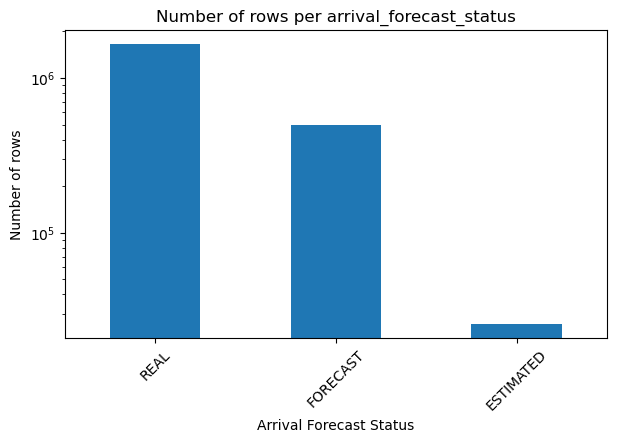

In [837]:
value_counts = transport_data['arrival_forecast_status'].value_counts()
plt.figure(figsize=(7, 4))
value_counts.plot(kind='bar', rot=45)
plt.title('Number of rows per arrival_forecast_status')
plt.xlabel('Arrival Forecast Status')
plt.ylabel('Number of rows')
plt.yscale('log')
plt.show()

### **5️⃣ departure_time, departure_forecast and departure_forecast_status**

The field `departure_time` described the theoretical departure time of transportation at a stop. The field `departure_forecast` describes the actual departure time of transportation at a stop. The field `departure_forecase_status` is an enumeration type field that describes the status of a transportation stop's arrival time. The possible values for this field are:

- **ESTIMATED**: The actual departure time has been estimated after the stop has been passed.
- **FORECAST**: This stop is a forecast and has not yet been confirmed.
- **REAL**: The effective actual departure time has been confirmed.
- ~~**UNKNOWN**: The status of the departure time is unknown.~~

We decide to do the following:

- Translate the `departure_forecast_status` values into English.
- Delete all rows that have `UNKNOWN` values in the `departure_forecast_status` column.

In [838]:
transport_data['departure_forecast_status'].unique().tolist()

[nan, 'PROGNOSE', 'REAL', 'UNBEKANNT', 'GESCHAETZT']

In [839]:
transport_data['departure_forecast_status'] = transport_data['departure_forecast_status'].replace({
    'PROGNOSE': 'FORECAST',
    'UNBEKANNT': 'UNKNOWN',
    'REAL': 'REAL',
    'GESCHAETZT': 'ESTIMATED',
})

In [840]:
transport_data['departure_forecast_status'].unique().tolist()

[nan, 'FORECAST', 'REAL', 'UNKNOWN', 'ESTIMATED']

In [841]:
print(f"Removing {transport_data[transport_data['departure_forecast_status'] == 'UNKNOWN'].shape[0]:,} rows with departure_forecast_status == UNKNOWN.")
transport_data = transport_data[transport_data['departure_forecast_status'] != 'UNKNOWN']
transport_data['departure_forecast_status'] = transport_data['departure_forecast_status'].cat.remove_unused_categories()

Removing 2,701 rows with departure_forecast_status == UNKNOWN.


In [842]:
# Remove rows where the departure_forecast is missing, but the departure_forecast_status and departure_time are not
print(f"Removing {transport_data[(transport_data['departure_time'].notna()) & (transport_data['departure_forecast'].isna()) & (transport_data['departure_forecast_status'].notna())].shape[0]:,} rows where the departure_forecast is missing, but the departure_forecast_status and departure_time are not.")
transport_data = transport_data[(transport_data['departure_time'].isna()) | (transport_data['departure_forecast'].notna()) | (transport_data['departure_forecast_status'].isna())]

Removing 208 rows where the departure_forecast is missing, but the departure_forecast_status and departure_time are not.


In [843]:
transport_data['departure_forecast_status'].unique().tolist()

[nan, 'FORECAST', 'REAL', 'ESTIMATED']

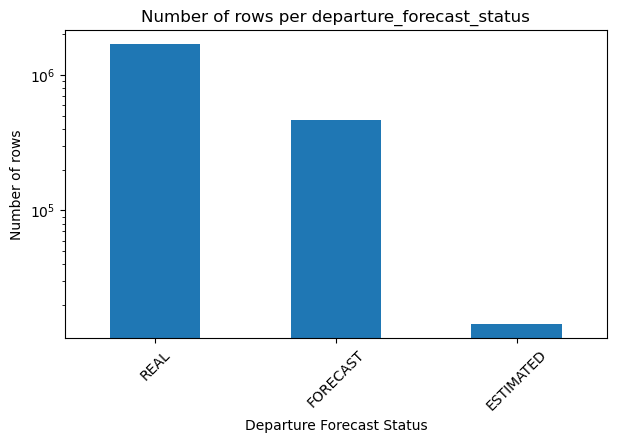

In [845]:
value_counts = transport_data['departure_forecast_status'].value_counts()
plt.figure(figsize=(7, 4))
value_counts.plot(kind='bar', rot=45)
plt.title('Number of rows per departure_forecast_status')
plt.xlabel('Departure Forecast Status')
plt.ylabel('Number of rows')
plt.yscale('log')
plt.show()

In [846]:
# Get number of missing values per column
print(f"Number of total missing values in the dataset: {transport_data.isna().sum().sum():,}")
print(f"Number of missing values per column: ")
transport_data.isna().sum()

Number of total missing values in the dataset: 2,000,580
Number of missing values per column: 


date                               0
trip_id                            0
operator_id                        0
operator_abbreviation              0
operator_name                      0
product_id                         0
line_id                            0
line_text                          0
circuit_id                   1181718
transport_type                     0
is_additional_trip                 0
is_cancelled                       0
stop_id                            0
arrival_time                  136383
arrival_forecast              136383
arrival_forecast_status       136383
departure_time                136571
departure_forecast            136571
departure_forecast_status     136571
is_through_trip                    0
stop_lon                           0
stop_lat                           0
stop_name                          0
dtype: int64

## **💾 Extract Operator Data**

In [746]:
OPERATOR_DATA_PATH = f'data/processed/{DATE_FILE}_operators.csv'
transport_data[['operator_id', 'operator_abbreviation', 'operator_name']] \
    .set_index('operator_id') \
    .drop_duplicates() \
    .to_csv(OPERATOR_DATA_PATH)

## **🗑️ Remove Unnecessary Columns**

We will remove the following columns:
- `circuit_id`: Circuits start whenever the vehicle drives out of the depot/garage and end when it drives back in again. More than half of the values are missing and we will not use it in our analysis.
- `line_id`: We will not rely on this column to identify the line of a transportation. We will use `trip_id` instead, which accounts for the direction of travel.
- `operator_id`: This value is contained within `trip_id`, we can safely remove it and if needed, easily extract it again.
- `operator_abbreviation` and `operator_name`: We created a dataset that maps each operator to its abbreviation and name.

In [747]:
useless_columns = ['circuit_id', 'line_id', 'operator_id', 'operator_abbreviation', 'operator_name']
transport_data = transport_data.drop(columns=useless_columns)

In [748]:
transport_data.dtypes

date                         datetime64[ns]
trip_id                              string
product_id                           object
line_text                            string
transport_type                       string
is_additional_trip                  boolean
is_cancelled                        boolean
stop_id                               int32
arrival_time                 datetime64[ns]
arrival_forecast             datetime64[ns]
arrival_forecast_status            category
departure_time               datetime64[ns]
departure_forecast           datetime64[ns]
departure_forecast_status          category
is_through_trip                     boolean
stop_lon                            float64
stop_lat                            float64
stop_name                            string
dtype: object

## **💾 Save Cleaned Data**

In [749]:
transport_data['product_id'] = transport_data['product_id'].astype('category')
transport_data['line_text'] = transport_data['line_text'].astype('category')
transport_data['transport_type'] = transport_data['transport_type'].astype('category')
transport_data['stop_lon'] = transport_data['stop_lon'].astype('int32')
transport_data['stop_lat'] = transport_data['stop_lat'].astype('int32')

In [750]:
transport_data.dtypes

date                         datetime64[ns]
trip_id                              string
product_id                         category
line_text                          category
transport_type                     category
is_additional_trip                  boolean
is_cancelled                        boolean
stop_id                               int32
arrival_time                 datetime64[ns]
arrival_forecast             datetime64[ns]
arrival_forecast_status            category
departure_time               datetime64[ns]
departure_forecast           datetime64[ns]
departure_forecast_status          category
is_through_trip                     boolean
stop_lon                              int32
stop_lat                              int32
stop_name                            string
dtype: object

In [751]:
CLEANED_DATA_PATH = f"data/processed/{DATE_FILE}_istdaten_cleaned.parquet"
transport_data.to_parquet(CLEANED_DATA_PATH)